In [1]:
import numpy as np
import pandas as pd
import gzip 
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#http://jmcauley.ucsd.edu/data/amazon/
#CDs and Vinyl 5-core

# Amazon CD's and Vinyl reviews

- I am keen to build a CD/music recommender based on amazon reviewed products. Currently it's not possible to attain good music review data, which is understandable given the commercial value it holds for companies like Spotify.
- Using

In [2]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


df = getDF('reviews_CDs_and_Vinyl_5.json.gz')
metadata = getDF('meta_CDs_and_Vinyl.json.gz')

In [66]:
# metadata = getDF('meta_CDs_and_Vinyl.json.gz')
metadata.head(10)

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0001501348,"Lenny LeBlanc, Alex Acuna, Justo Almario, Tom ...",Lift Him Up With Ron Kenoly [VHS],http://ecx.images-amazon.com/images/I/412JH6CM...,"{'also_bought': ['6303646611', 'B000002C45', '...",{'Movies & TV': 359265},"[[CDs & Vinyl, Christian, Pop & Contemporary],...",NaN,NaN
1,0001393774,Audio CD,Songs for the Shepherd,http://ecx.images-amazon.com/images/I/51MC7A5N...,"{'also_bought': ['B0016CP2GS', 'B0000275QQ', '...",{'Music': 41017},"[[CDs & Vinyl, Christian]]",16.64,
2,0005123909,18 Music Videos for Kids: Do Your Ears Hang Lo...,Silly Songs: 18 Wholesome Fun Songs for Kids [...,http://ecx.images-amazon.com/images/I/41K31EWE...,"{'also_bought': ['B00000JLTM', 'B00006L97L', '...",{'Movies & TV': 451209},"[[CDs & Vinyl, Children's Music], [Movies & TV...",29.98,NaN
3,0005072298,NaN,Hymns: 16 Classic Hymns for Children,http://ecx.images-amazon.com/images/I/510RRJWQ...,"{'also_viewed': ['B00000DPLL', 'B000008UPG', '...",{'Music': 350804},"[[CDs & Vinyl, Children's Music], [CDs & Vinyl...",6.26,NaN
4,0005224896,NaN,"Voice of the Wind: Personal Worship, Vol. 1",http://ecx.images-amazon.com/images/I/51SS0SRM...,"{'also_bought': ['B001EMSQOK', 'B001EMQ6H4', '...",{'Music': 347825},"[[CDs & Vinyl, Christian, Praise & Worship]]",8.99,NaN
5,0005134188,VHS Tape,Toddler Tunes [VHS],http://ecx.images-amazon.com/images/I/51R9WN97...,"{'also_bought': ['0005123968', 'B00000JLTM', '...",{'Movies & TV': 363858},"[[CDs & Vinyl, Children's Music], [Movies & TV...",17.99,NaN
6,0005441382,Book by,Bless My Little Girl,http://ecx.images-amazon.com/images/I/417BY0YD...,"{'also_bought': ['B000008D5R', 'B000008MCS', '...",{'Music': 54044},"[[CDs & Vinyl, Children's Music], [CDs & Vinyl...",12.05,NaN
7,0026197898,"When you first hear The Sudden Passion, you d ...",Southern Fashion,http://ecx.images-amazon.com/images/I/6139OLQU...,NaN,NaN,"[[CDs & Vinyl, Alternative Rock, Indie & Lo-Fi...",14.23,NaN
8,0152222227,NaN,Got Jewish,http://ecx.images-amazon.com/images/I/51jVen%2...,NaN,{'Music': 1185025},"[[CDs & Vinyl, World Music, Middle East, Israel]]",19.99,NaN
9,030714142X,NaN,Encyclopedia Brown: Ghostly Rider [VHS],http://ecx.images-amazon.com/images/I/51Q45SEJ...,"{'also_bought': ['0307142418', '6302965497', '...",{'Movies & TV': 427298},"[[CDs & Vinyl, Children's Music], [Movies & TV...",NaN,NaN


In [3]:
## merge metadata with df to get product name
metadata['productType'] = metadata['salesRank'].apply(lambda x: [str(i) for i in x][0] if len(str(x))>4 else '')
metadata.groupby('productType')['asin'].count().rename('products').reset_index()
# [k for k in dick][0]

,productType,products
0,,8569
1,Beauty,2
2,Books,5
3,Cell Phones & Accessories,1
4,Electronics,3
5,Health & Personal Care,5
6,Home &amp; Kitchen,1
7,Movies & TV,15545
8,Music,468646
9,"Patio, Lawn & Garden",1


In [28]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3IEV6R2B7VW5Z,0307141985,J. Anderson,"[14, 15]",I don't know who owns the rights to this wonde...,5.0,LISTEN TO THE PUBLIC!!!,1128556800,"10 6, 2005"
1,A2H3ISQ4QB95XN,0307141985,Joseph Brando,"[2, 2]",Thanksgiving is devoid of icons to make it a f...,4.0,Rankin/Bass Does Thanksgiving!!,1322006400,"11 23, 2011"
2,A6GMEO3VRY51S,0307141985,microjoe,"[38, 38]",This is a Thanksgiving tale that begins with t...,5.0,Thanksgiving Holiday fun from Rankin/Bass,1058140800,"07 14, 2003"
3,A3E102F6LPUF1J,0307141985,"Richard J. Goldschmidt ""Rick Goldschmidt""","[15, 16]",This is the BEST THANKSGIVING special around.....,5.0,BEST THANKSGIVING special out there!,1068076800,"11 6, 2003"
4,A2JP0URFHXP6DO,0307141985,Tim Janson,"[11, 12]",It's been a number of years since I've seen Mo...,5.0,A THANKSGIVING TRADITION,1141171200,"03 1, 2006"


In [127]:
print(f'total reviews = {len(df)}')
# print(f'total reviews = {len(metadata[metadata['productType']=='Music'])}'

total reviews = 1097592


In [4]:
#merge with metadata but only on music
df_music = df.merge(metadata[metadata['productType']=='Music'][['title', 'asin']], how='inner', on='asin')

In [135]:
df_music.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title
0,A32MTXFASQXBX,1450734618,Brent Trafton,"[2, 2]",I bought several meditation CD's from Amazon b...,5.0,Best Meditation CD Ever!,1321056000,"11 12, 2011",Goodbye Worries
1,A2OXQPVQ4YD4TO,1450734618,E.J.H.,"[0, 0]",This CD allows you to relax and bring yourself...,4.0,Calm and effective,1364428800,"03 28, 2013",Goodbye Worries
2,A1N3NCQFX2UDOY,1450734618,Emily B,"[0, 0]",Very calming. Is great for my anxiety. Soothin...,5.0,PERFECT,1291075200,"11 30, 2010",Goodbye Worries
3,A2NYPOQLOL61M4,1450734618,halloweengirl,"[1, 2]",This is a very calming and soothing CD. I use...,4.0,goodbye worries,1373846400,"07 15, 2013",Goodbye Worries
4,A1D9U33OHQTO18,1450734618,Julie L. Friedman,"[0, 0]",The Calming Collection / Goodbye Worries is ex...,5.0,"Gregg L. Friedman MD, Psychiatrist, Hallandale...",1339027200,"06 7, 2012",Goodbye Worries


C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


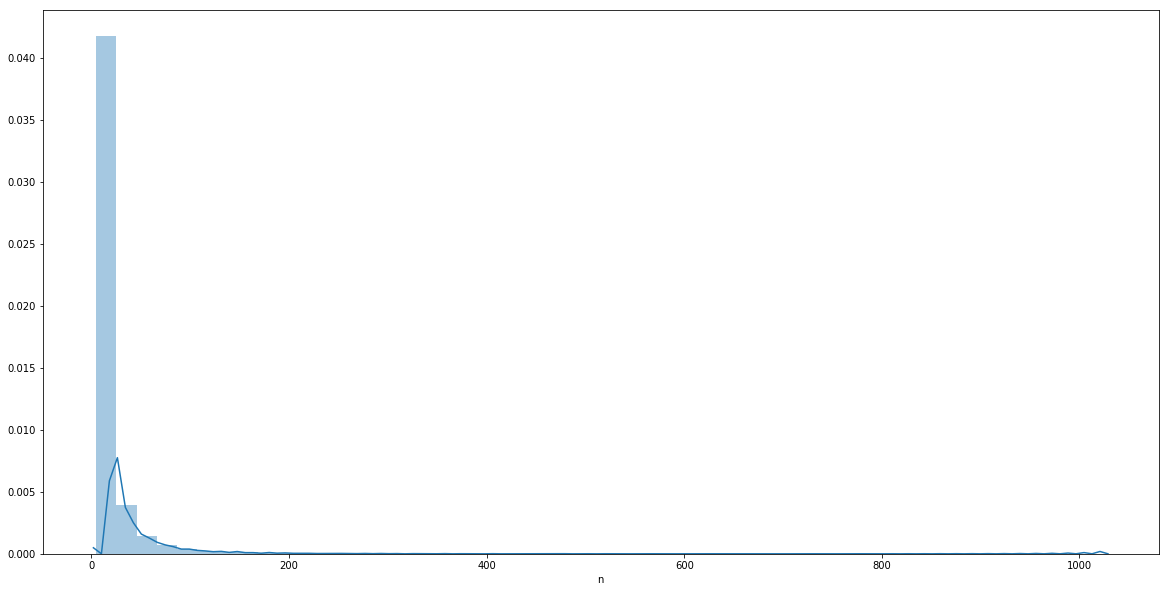

In [130]:
#looks like there's a decent amount of reviews per product
plt.figure(figsize=(20,10))
sns.distplot(df_music.groupby('asin')['reviewerID'].count().rename('n').reset_index().sort_values('n', ascending=False)['n'])

In [5]:
#Transform each reviewer into an index
users_list = df_music['reviewerName'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = df_music['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}

In [137]:
users_list[0], prod_list[0]

('Brent Trafton', 'Goodbye Worries')

In [138]:
prod_index['Goodbye Worries'], users_index['Brent Trafton']

(0, 0)

## Build separate user and product matrices

In [5]:
from fastai.collab import * 

In [7]:
review_df_sub = df_music[['reviewerName', 'asin', 'overall', 'title']]
#Insert reviewer id into dataset
review_df_sub['reviewerID'] = review_df_sub['reviewerName'].apply(lambda x: users_index[x])
review_df_sub = review_df_sub.drop('reviewerName', axis=1)
review_df_sub.head()
data = CollabDataBunch.from_df(review_df_sub[['reviewerID', 'asin', 'overall', 'title']]
                               , seed=42,bs=64,num_workers=0, item_name='title')

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
data.show_batch()

reviewerID,title,target
46602,Hurricane,3.0
3313,666: Apocalypse of St John,5.0
35102,Diary of a Madman,5.0
45795,#na#,5.0
10934,Whitey Ford Sings the Blues,5.0


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


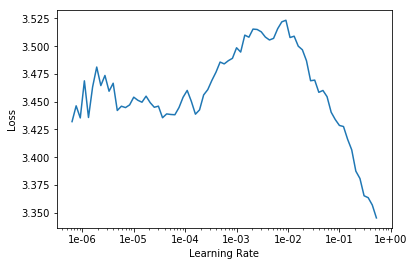

In [142]:
y_range = [0,5.5]
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [143]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,time
0,1.925484,1.937271,37:05
1,1.759848,1.744128,32:15


In [144]:
learn.save('dotprod')
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(69822, 40)
  (i_weight): Embedding(42417, 40)
  (u_bias): Embedding(69822, 1)
  (i_bias): Embedding(42417, 1)
)

In [39]:
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
top_music[:10]

array(['Greatest Hits', 'Best of', 'Ultimate Collection', 'St. Anger',
       'Dark Side of the Moon', 'Anthology', 'Gold', 'Fallen', 'Live',
       'Very Best of'], dtype=object)

In [154]:
music_bias = learn.weight(top_music, is_item=True)
music_bias.shape

torch.Size([1000, 40])

In [180]:
mean_ratings = df_music.groupby('title')['overall'].mean()
music_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_music,music_bias)]

In [518]:
music_w = learn.weight(top_music, is_item=True)
music_w.shape

torch.Size([1000, 40])

In [533]:
music_w[0], music_ratings[0]

(tensor([ 0.0886, -0.0410, -0.0486,  0.0986, -0.0159, -0.0351, -0.3887, -0.3785,
          0.1620, -0.0631, -0.2019, -0.0128, -0.0767, -0.1874, -0.2147, -0.1671,
          0.0400, -0.2695,  0.1491, -0.0465,  0.0806,  0.1046,  0.0469, -0.1373,
          0.0055,  0.3506,  0.0722, -0.0937, -0.1777,  0.3994, -0.1202,  0.1064,
          0.0521, -0.0375, -0.0994,  0.0369,  0.3306,  0.0016, -0.1506,  0.0480]),
 (tensor([ 0.0886, -0.0410, -0.0486,  0.0986, -0.0159, -0.0351, -0.3887, -0.3785,
           0.1620, -0.0631, -0.2019, -0.0128, -0.0767, -0.1874, -0.2147, -0.1671,
           0.0400, -0.2695,  0.1491, -0.0465,  0.0806,  0.1046,  0.0469, -0.1373,
           0.0055,  0.3506,  0.0722, -0.0937, -0.1777,  0.3994, -0.1202,  0.1064,
           0.0521, -0.0375, -0.0994,  0.0369,  0.3306,  0.0016, -0.1506,  0.0480]),
  'Greatest Hits',
  4.376143292682927))

In [179]:
music_w[0]

tensor([ 0.0886, -0.0410, -0.0486,  0.0986, -0.0159, -0.0351, -0.3887, -0.3785,
         0.1620, -0.0631, -0.2019, -0.0128, -0.0767, -0.1874, -0.2147, -0.1671,
         0.0400, -0.2695,  0.1491, -0.0465,  0.0806,  0.1046,  0.0469, -0.1373,
         0.0055,  0.3506,  0.0722, -0.0937, -0.1777,  0.3994, -0.1202,  0.1064,
         0.0521, -0.0375, -0.0994,  0.0369,  0.3306,  0.0016, -0.1506,  0.0480])

In [158]:
music_pca = music_w.pca(2)
music_pca.shape

torch.Size([1000, 2])

In [159]:
fac0,fac1 = music_pca.t()
music_comp = [(f, i) for f,i in zip(fac0, top_music)]

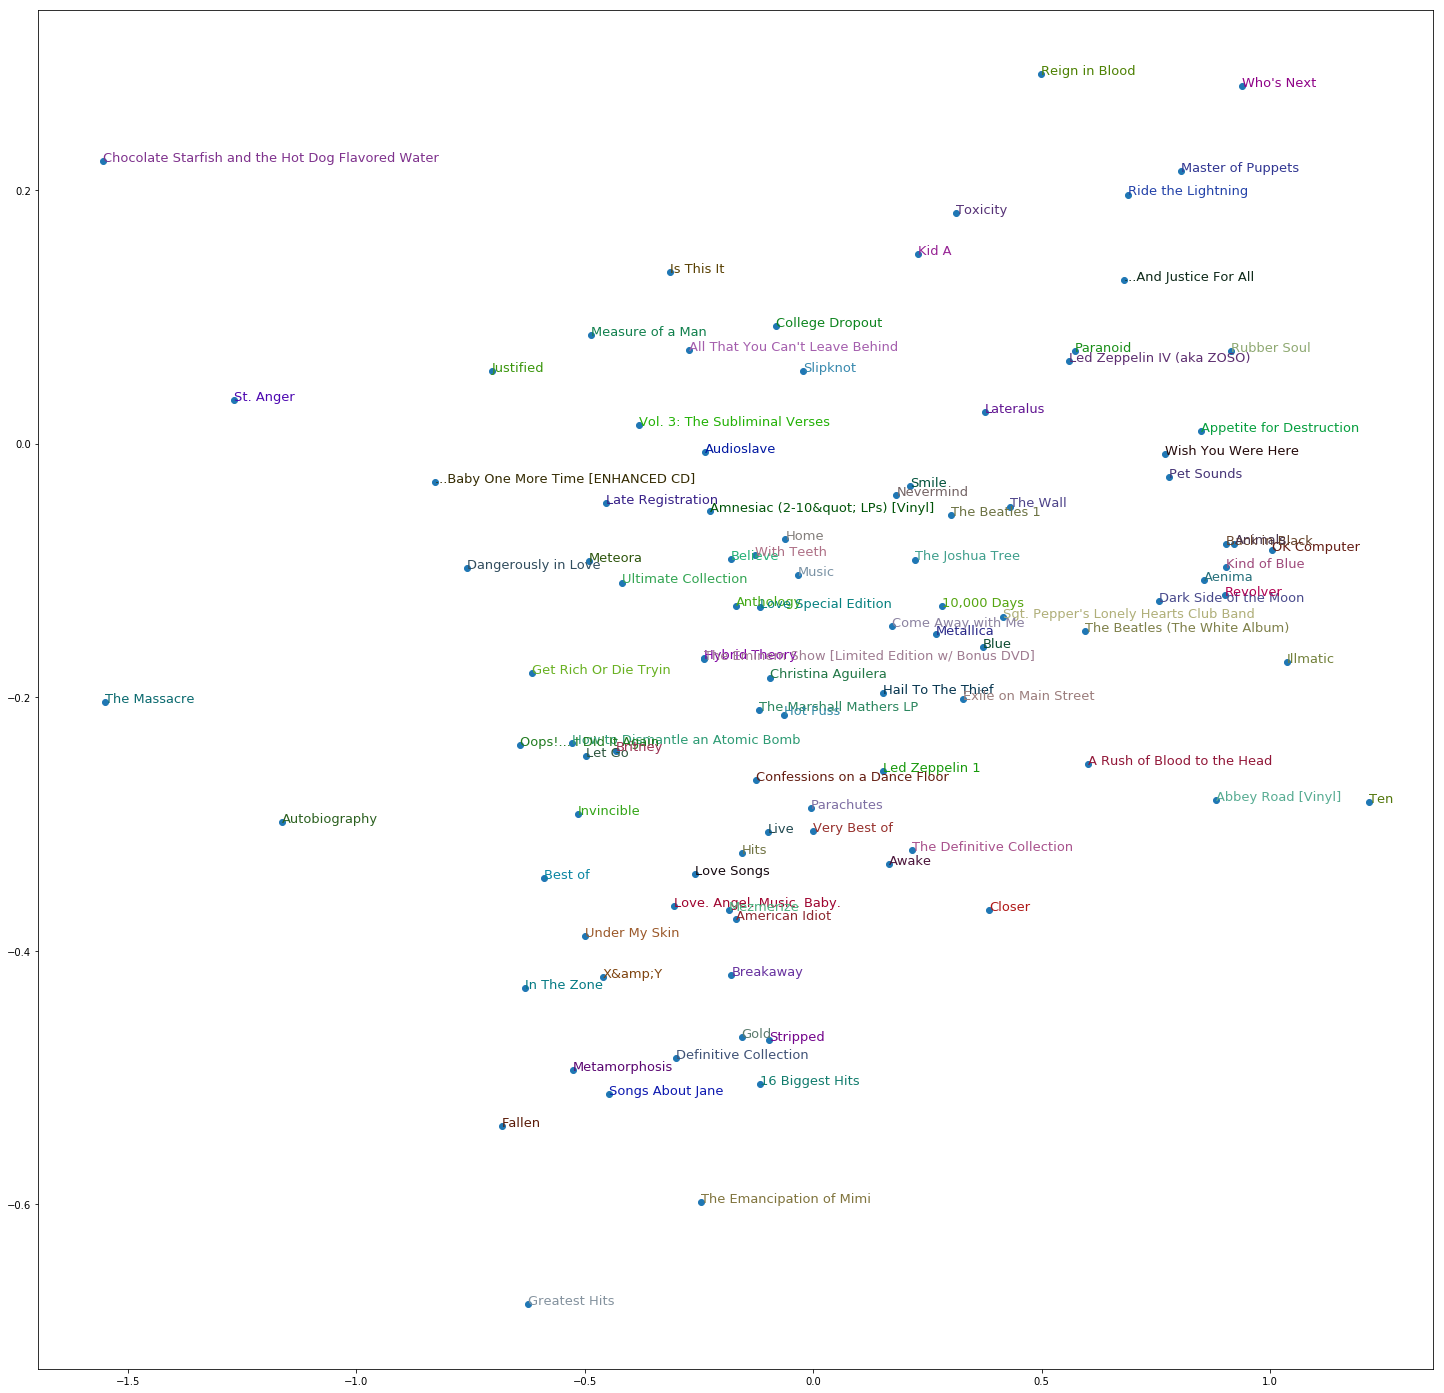

In [701]:
idxs = np.random.choice(len(top_music), 200, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(25,25))
plt.scatter(X, Y)
for i, x, y in zip(top_music[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13)
plt.show()

The autoecoder seems to have picked up general music genre and tastes.
Having slayer and metallica in the top right and the music getting softer as you travel down vertically.

## Unpacking the embedding model and rewriting

'CollabDataBunch' is a class that transforms a dataframe into a split of users and items into separate tensors, and splits into training and testing/validation sets
We split these into separate dataframes in order to save memory and computation. The alternative is to have one big matrix and use one hot encoding (slower).

In [6]:
#Transform each reviewer into an index
users_list = df_music['reviewerName'].unique()
users_index = {user: idx for idx, user in enumerate(users_list)}
#tranform each prod into an index
prod_list = df_music['title'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}

In [7]:
#get a simple dataframe in order
review_df_sub = df_music[['reviewerName', 'asin', 'overall', 'title']]
review_df_sub['reviewerID'] = review_df_sub['reviewerName'].apply(lambda x: users_index[x]).astype('int')
review_df_sub['prodID'] = review_df_sub['title'].apply(lambda x: prod_index[x]).astype('int')
review_df_sub = review_df_sub.drop('reviewerName', axis=1)
review_df_sub.head()

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,asin,overall,title,reviewerID,prodID
0,1450734618,5.0,Goodbye Worries,0,0
1,1450734618,4.0,Goodbye Worries,1,0
2,1450734618,5.0,Goodbye Worries,2,0
3,1450734618,4.0,Goodbye Worries,3,0
4,1450734618,5.0,Goodbye Worries,4,0


In [8]:
prod_list = review_df_sub['prodID'].unique()
prod_index = {prod: idx for idx, prod in enumerate(prod_list)}

In [9]:
import random #for random sampling of the data for batches
#We just want to start by creating a simple batch loader.
def batch_loader(df, b_size=64, rm_list=[]):
    #remove from the df the list of items that have already been loaded
    #grab a sample of the batchsize specified
    rm_list = rm_list.tolist()
    if b_size>len(df[['reviewerID', 'prodID', 'overall']].drop(rm_list)):
        b_size=len(df[['reviewerID', 'prodID', 'overall']].drop(rm_list))
    batch = df[['reviewerID', 'prodID', 'overall']].drop(rm_list, axis=0).sample(b_size).values
    #switch ids back to int
    yield {'user': batch[:, 0].astype('int'), 'prod': batch[:, 1].astype('int')}, batch[:, 2]

In [119]:
next(batch_loader(review_df_sub.head(15), rm_list=[2,3,12]))

({'user': array([ 4, 11,  8,  9,  1, 14,  6, 13, 10,  5,  7,  0]),
  'prod': array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])},
 array([5., 5., 1., 5., 4., 5., 5., 5., 5., 4., 5., 5.]))

In [9]:
# Show a few example training pairs
a, b = next(batch_loader(review_df_sub, 10))
for label, user_id, prod_id in zip(b, a['user'], a['prod']):
    print(f'user: {users_list[(user_id)]:30} prod: {prod_list[(prod_id)]:30} review: {label}')

user: Erick Bertin                   prod:                          31944 review: 2.0
user: W. Landers                     prod:                          38927 review: 4.0
user: Jim Steele                     prod:                          18717 review: 5.0
user: Karl W. Nehring                prod:                          24314 review: 2.0
user: Mauro Aguirre                  prod:                           1794 review: 5.0
user: stan25                         prod:                          40886 review: 5.0
user: thatDonOguy "Don-O"            prod:                           5442 review: 5.0
user: twinky buttspong               prod:                          23817 review: 3.0
user: Johnny Heering "trivia buff"   prod:                          13070 review: 3.0
user: M. Detko "detkoralph"          prod:                            771 review: 5.0


In [198]:
#we need weights for the: Users, products (music), bias for Users, and bias for products (music).
#so 4 parameters.
from torch.nn import Module, Embedding, MSELoss
from torch.optim import *
from torch.autograd import Variable
import torch 

class EmbeddingModel(Module):
    #initiate the weights and biases of user and product.
    #these need to be leared through forward pass
    def __init__(self, n_dims, n_users, n_items, y_range):
        super(EmbeddingModel, self).__init__()
        self.y_range=y_range #the review range (0-5+)
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [Embedding(*o) for o in [
            (n_users, n_dims), #user weights
            (n_items, n_dims), #product weights
            (n_users,1), #user bias
            (n_items,1)]] #product bias
    def forward(self, users, items):
        matmul = self.u_weight(users)* self.i_weight(items)
        out = matmul.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        #run output through a sigmoid
        out = torch.sigmoid(out) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]
        return torch.tensor(out, requires_grad=True)

In [199]:
#learning 40 dimensions per uer and product (expanding the feature space from 1 per to 40 per)
model = EmbeddingModel(n_dims=40, n_users=len(users_list),
               n_items=len(prod_list), y_range=[0,5.5])
#the weight of the first user in the batch:
model.u_weight(torch.tensor([0]))
#the weight of the first prod in the batch:
model.i_weight(torch.tensor([0]))

tensor([[ 1.1622, -0.4054,  0.8661, -0.0210, -0.3217, -0.3242,  0.9125, -0.3479,
          1.4160,  0.5875,  0.0890, -0.5608,  0.0848,  0.8509,  0.9485, -0.0127,
          0.4910, -2.3813, -0.2299, -1.1655, -2.8979,  0.2699, -0.5668,  0.9076,
          1.0627,  0.4378,  0.0887,  0.7205, -1.2440, -0.5334, -0.7940, -0.0608,
         -1.1675, -0.1366,  1.8299,  0.5238,  1.2573,  0.1949,  0.7283, -0.8361]],
       grad_fn=<EmbeddingBackward>)

In [ ]:
#example forward pass
a, b = next(batch_loader(review_df_sub, 10))
# model.forward(torch.tensor(a['user']).long(),torch.tensor(a['prod']).long())

In [188]:
#we have a simple architecture now (embeddings). 
#we need to build a learner to train the model with
# Loop over epochs
import math
import torch.nn.functional as F
# max_epochs = math.ceil(len(review_df_sub) / 64)
max_epochs = 2
optimizer = Adam(model.parameters(),lr=1e-2,weight_decay=1e-1)
optimizer.zero_grad()
loss_values = []
rm_list = np.array([])
for epoch in range(max_epochs):
    # Training
    loss= 0.
    for local_batch, local_labels in batch_loader(review_df_sub, rm_list=rm_list):
        #pass in the indices of the batch user and prod 
        output = model.forward(torch.tensor(local_batch['user']).long(), torch.tensor(local_batch['prod']).long())
        #compare outputs of batch with n=64 to label and compute the loss
        labels = torch.from_numpy(local_labels).float()
        #calculate the loss
        a = model.i_weight(torch.tensor(local_batch['prod']).long())[0]
        loss = F.mse_loss(output, labels, True)
        #update the parameters using backpropogation
        loss.backward()
        optimizer.step()
        b = model.i_weight(torch.tensor(local_batch['prod']).long())[0]
        #check if it's trained
        torch.equal(a.data, b.data)
        optimizer.zero_grad()
#     loss_values.append(loss.data.item())
    #keep a record of batched items, to remove from each epoch
    rm_list = np.append(rm_list, local_batch['user'])
    #every so often we need to check if the model is working so we return total loss to get an idea of that
    #we'll do this every 100 epochs
    if epoch % 1 == 0:
        loss= 0.
        #load full dataset and run forward pass
        full_batch, full_labels = next(batch_loader(review_df_sub, b_size=len(review_df_sub), rm_list=np.array([])))
        output_full = model.forward(torch.tensor(full_batch['user']).long(), torch.tensor(full_batch['prod']).long())
        #compare outputs of batch with n=64 to label and compute the loss
        outputs_full, labels_full = Variable(torch.tensor(output_full), requires_grad=False), Variable(torch.from_numpy(full_labels).float())
        #calculate the loss
        loss = loss_function(outputs_full, labels_full)
        loss_values.append(loss.data.item())
    

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detac

In [196]:
a,output,output.grad, labels
# model.forward(torch.tensor(local_batch['user']).long(), torch.tensor(local_batch['prod']).long()),torch.tensor(local_batch['user'])

(tensor([ 0.3572, -1.0619, -1.3684, -0.6544, -1.2189, -1.7946,  1.8511, -0.7468,
          0.3610,  0.2412, -0.9761,  0.2881, -1.1414,  0.4028, -0.6912, -1.6181,
         -0.4484,  1.4322, -0.1193,  0.2872, -0.9462,  3.0778, -0.7633, -1.6421,
          0.2623, -0.0421,  0.1105,  1.5158, -1.2655, -0.4108,  0.8438,  1.0923,
          0.3593,  2.7503, -0.7463, -1.2865,  0.3885,  1.4204, -0.0150, -0.5093],
        grad_fn=<SelectBackward>),
 tensor([5.4998e+00, 5.4944e+00, 9.9340e-01, 5.4998e+00, 7.1657e-01, 1.5346e-01,
         5.5000e+00, 4.9981e-03, 3.2701e-03, 8.2369e-02, 1.0763e-01, 5.4999e+00,
         2.8787e+00, 2.2907e-04, 6.1800e-05, 1.2750e-01, 4.4278e-01, 5.4393e+00,
         4.8810e+00, 9.6042e-02, 5.4991e+00, 5.4353e+00, 5.3024e+00, 5.4981e+00,
         1.0901e-02, 3.3678e-01, 4.7683e+00, 5.4845e+00, 5.4999e+00, 5.4952e+00,
         5.5000e+00, 5.3206e+00, 4.1225e+00, 5.8183e-01, 5.3380e+00, 2.5767e-01,
         3.0849e-02, 2.4972e+00, 5.4953e+00, 1.1041e-01, 3.3070e+00, 2.79

([<matplotlib.lines.Line2D at 0x1f42065aa20>], 0.9934)

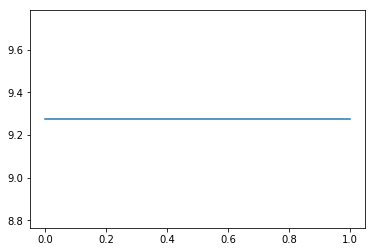

In [197]:
plt.plot(loss_values)

In [23]:
x, y = next(batch_loader(review_df_sub, b_size=len(review_df_sub), rm_list=np.array([])))
x

{'user': array([62191, 35609, 12409, ..., 16509, 32522,  9504]),
 'prod': array([35909, 16908, 15944, ..., 24738, 23303, 12661])}

In [35]:
torch.save(model.state_dict(), 'dotprod_scratch2')

In [36]:
w = list(model.parameters())
users_w = w[0]
items_w = w[1]

In [37]:
w[0][[0,1]]

tensor([[-0.1976,  0.4833,  1.0149, -1.2585,  0.7600,  1.2291,  0.0239, -1.1273,
          1.5649, -0.3590,  1.4302, -0.1161, -1.5175,  1.7632,  0.1185, -1.4023,
          0.5260, -0.4782, -0.7379,  0.1798,  0.3070, -0.5099, -1.0095, -0.3576,
          0.1983, -0.0138, -1.3906, -1.1624,  0.4695,  0.1597,  1.1868,  1.8393,
         -1.3256, -1.4676, -0.8705,  1.0252,  0.9331, -0.4184, -0.2248, -0.7020],
        [ 0.8147,  0.2816,  0.3493, -0.2613, -0.0298, -1.2041,  0.3683, -0.5594,
         -1.4196,  0.0730,  0.4554,  1.3429, -0.4492,  0.1884,  0.6152, -0.3066,
          0.3312,  1.2970,  0.1931,  1.4788,  0.4671,  3.1570, -0.6587,  0.0400,
         -0.3586, -0.8177,  0.3799,  1.0800,  0.0911,  2.1674,  0.1384, -0.7930,
          0.1015,  0.0770,  1.4750, -0.0346, -0.1072,  0.6799,  1.4351, -1.6732]],
       grad_fn=<IndexBackward>)

In [40]:
items_w.shape
top_music[0], items_w[0]

('Greatest Hits',
 tensor([ 0.9006, -0.9737, -0.9968,  1.0641,  0.3980, -0.3043, -1.6347, -0.4326,
         -0.4178,  0.8031,  0.5743,  0.0640, -1.1869,  0.1719,  0.0218,  0.3851,
         -0.9561,  0.7158, -0.8518,  0.5566, -0.5489, -1.0005,  0.5961, -1.3629,
          1.6483, -0.6818,  2.8402, -0.3794,  0.8347, -0.0532, -1.4504, -1.5646,
         -1.6080, -0.8965, -0.1957,  0.2611, -0.5241, -0.7329,  0.3655,  0.5887],
        grad_fn=<SelectBackward>))

In [41]:
g = df_music.groupby('title')['overall'].count()
top_music = g.sort_values(ascending=False).index.values[:1000]
top_music[:10]

array(['Greatest Hits', 'Best of', 'Ultimate Collection', 'St. Anger',
       'Dark Side of the Moon', 'Anthology', 'Gold', 'Fallen', 'Live',
       'Very Best of'], dtype=object)

In [42]:
music_index = dict(zip(review_df_sub['title'], review_df_sub['prodID']))

In [43]:
#from fastai - torch pca
def _pca(x, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])
torch.Tensor.pca = _pca

In [44]:
top_music_w = items_w[[music_index[x] for x in top_music.tolist()]]
top_music_w_pca = top_music_w.detach().pca(2)

In [45]:
top_music_w_pca.shape

torch.Size([1000, 2])

In [46]:
fac0,fac1 = top_music_w_pca.t()
music_comp = [(f, i) for f,i in zip(fac0, top_music)]

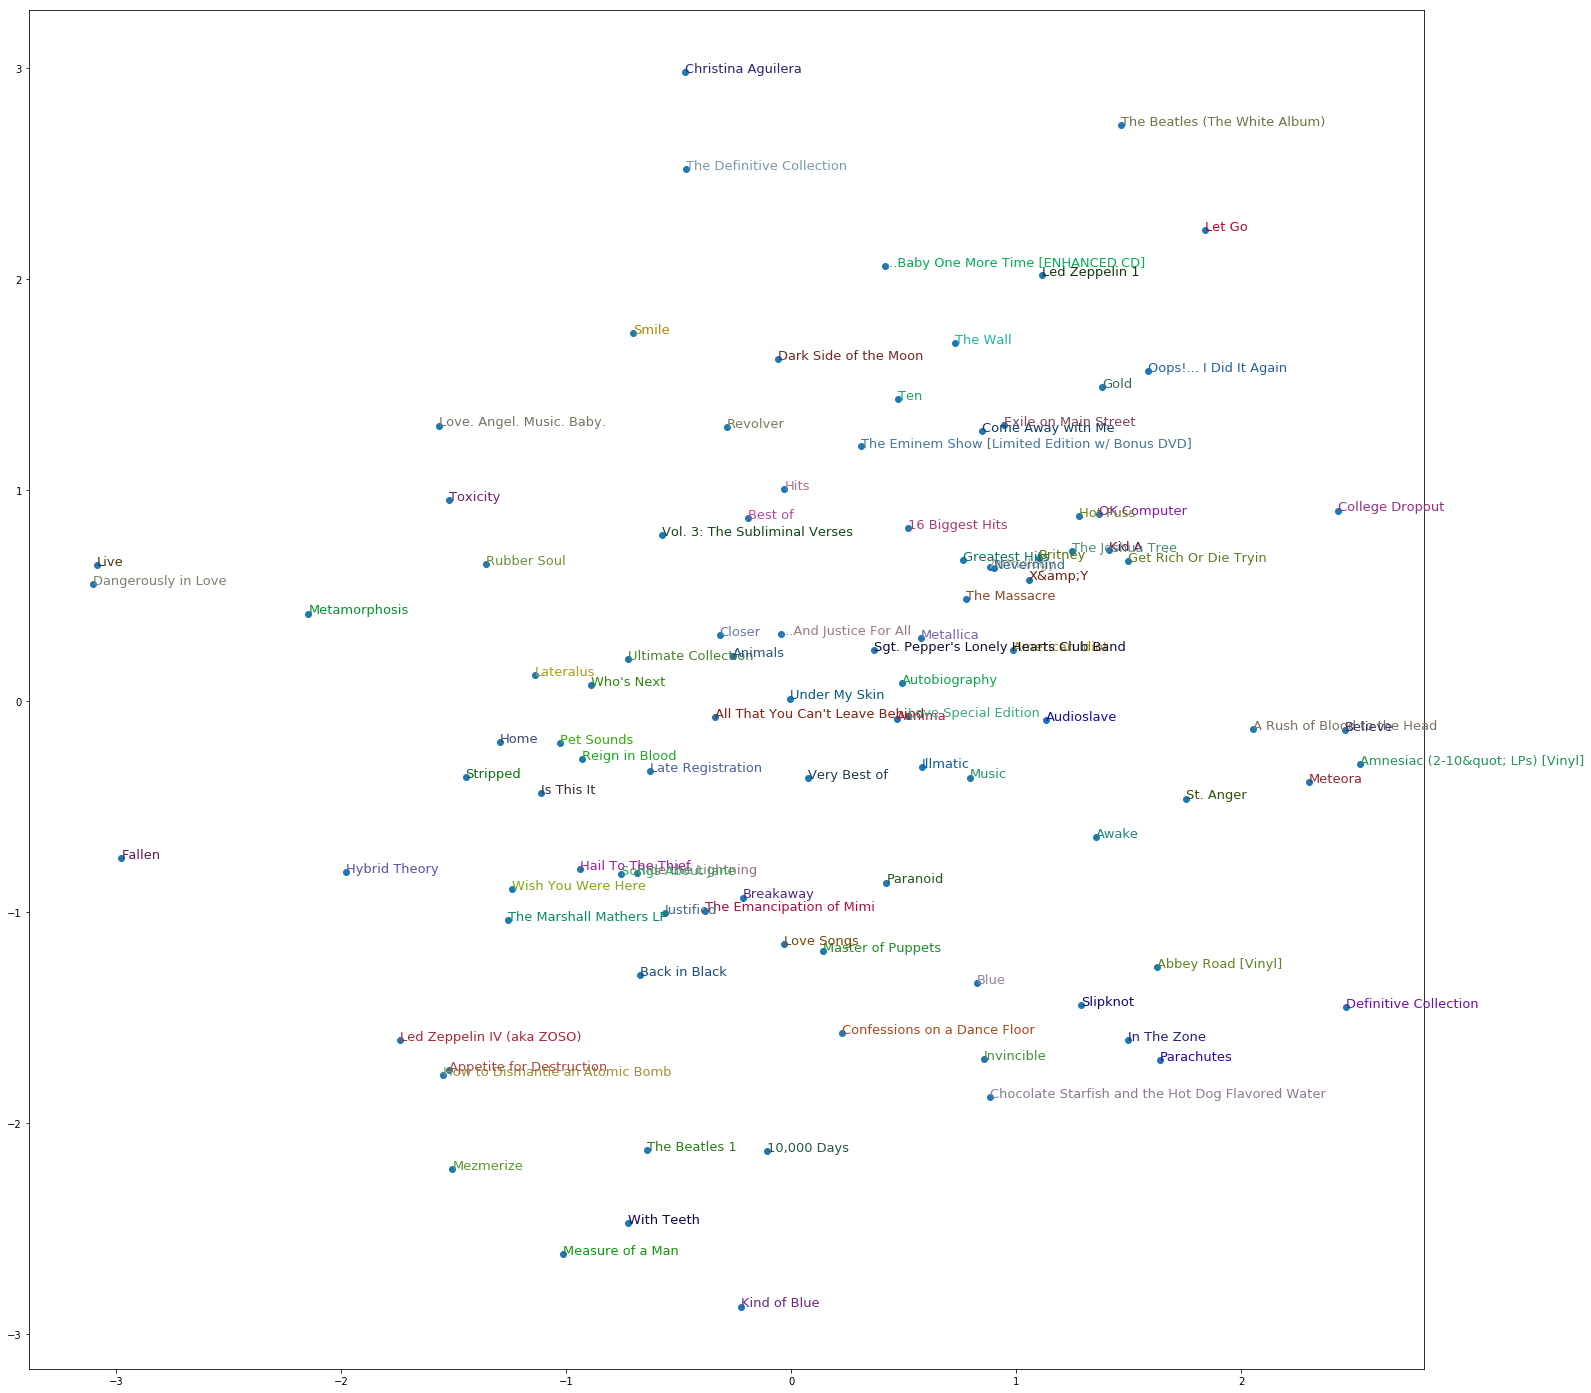

In [47]:
idxs = np.random.choice(len(top_music), 200, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(25,25))
plt.scatter(X, Y)
for i, x, y in zip(top_music[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=13)
plt.show()

### From simple Embedding to Autoencoder
- Note that thus far we have not done any 'real' deep learning. We've only dropped some data into a higher dimension space and learned distances and similarities between the data points in this new space (an embedding).
https://www.quora.com/What-is-the-difference-between-an-embedding-and-the-hidden-layer-of-an-autoencoder